In [2]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
plt.rc('font',family='Times New Roman')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


[428.70767763   2.        ]
[1000. 1000.]
[734.38245112  20.        ]


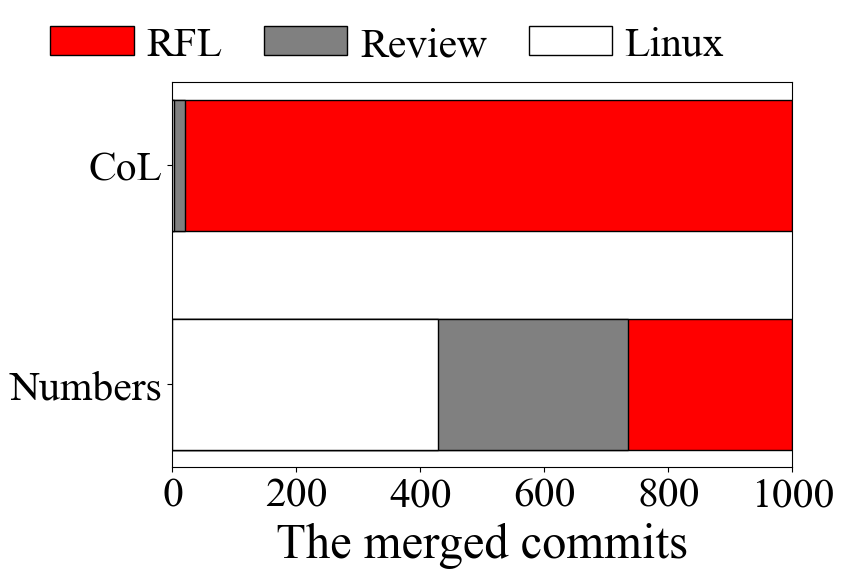

In [4]:
fs = 30
# opBreakdown (percentage bar)

commit1 = 899 # in linux
commit2 = 1540-899 # in github
commit3 = 557 # in PR

op1 = np.array([commit1, 2,]) # compute #, 34.02 * 29
op2 = np.array([commit1+commit2+commit3, 1000],) # communicate 
op3 = np.array([commit1+commit2, 20,]) # compute #, 34.02 * 29

# op_sum = op1 + op2

op1_regular = op1/op2*1000
op2_regular = op2/op2*1000
op3_regular = op3/op2*1000

print(op1_regular)
print(op2_regular)
print(op3_regular)

devices = ["Numbers", "CoL"]
# devices = ["Jetson TX2", "Jetson Nano", "RPI 4B"]
color = ['darkred', 'darkblue', 'green', '#FF8C00', ]#'#9370DB', 'hotpink'
# color = ['darkred', 'darkblue', 'green', '#FF8C00', '#9370DB', 'hotpink']
# 横向
bottom = 0
plt.figure(figsize=(8,5))
# plt.xlabel("Training time breakdown (%)", fontsize=35,labelpad=5)
plt.xlabel("The merged commits", fontsize=35,labelpad=5)
# plt.xscale("log")
plt.xlim(0,1000)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)


# bottom = bottom + op1_regular
plt.barh(devices, op2_regular, height=0.6, label="RFL", color="red", left=bottom,edgecolor='black',hatch="")

plt.barh(devices, op3_regular, height=0.6, label="Review", color="grey", left=bottom,edgecolor='black',hatch="")

plt.barh(devices, op1_regular, height=0.6, label="Linux", color="white",edgecolor='black',hatch="",)

plt.legend(fontsize=30, loc=4, ncol=4, bbox_to_anchor=(0.95, 0.95), frameon=False,columnspacing = 1.0,handletextpad=0.3)

plt.savefig('./figs/eval-preliminary-breakdown.pdf', bbox_inches="tight")

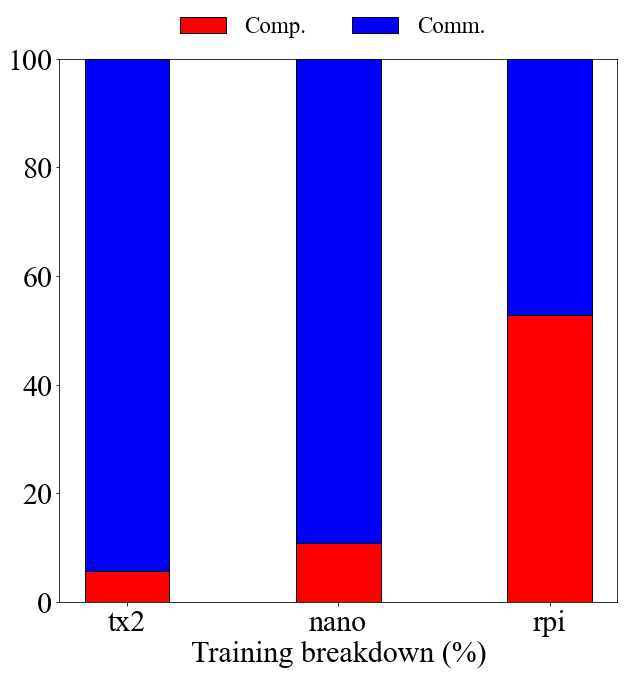

In [24]:
fs = 30
# opBreakdown (percentage bar)

op1 = np.array([1.86 * 29, 1.86 * 29 * 2, 34.02 * 29]) # compute
op2 = np.array([110.01 * 4 * 2] * 3) # communicate 

op_sum = op1 + op2

op1_regular = op1/op_sum*100
op2_regular = op2/op_sum*100

devices = ["tx2", "nano", "rpi"]
color = ['red', 'blue', 'green', '#FF8C00', '#9370DB', 'hotpink']
# 横向
bottom = 0
plt.figure(figsize=(10,10))
plt.xlabel("Training breakdown (%)", fontsize=fs)
plt.ylim(0,100)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.bar(devices, op1_regular, width=0.4, label="Comp.", color=color[0],edgecolor='black')

bottom = bottom + op1_regular
plt.bar(devices, op2_regular, width=0.4, label="Comm.", color=color[1], bottom=bottom,edgecolor='black')

plt.legend(fontsize=23, loc=4, ncol=4, bbox_to_anchor=(0.8, 1), frameon=False)

plt.savefig('../figs/eval-preliminary-breakdown-v.pdf', bbox_inches="tight")